In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df1 = pd.read_csv('data.csv')
df1.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2.0,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1.0,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.shape

(285332, 70)

In [ ]:
df=df1.loc[:,df1.columns!='accident_index']

In [ ]:
df2=df.loc[:,df.columns!='local_authority_(highway)']

In [ ]:
df3=df2.loc[:,df2.columns!='lsoa_of_accident_location']

In [ ]:
df4=df3.loc[:,df3.columns!='date']

In [ ]:
df5=df4.loc[:,df4.columns!='time']

In [ ]:
df6=df5.fillna(0)

In [ ]:
Y_mnl = df6['accident_severity']  #Response
X_mnl = df6.drop(['accident_severity'],1)  #Predictors

import statsmodels.api as st
X_mnl = st.add_constant(X_mnl, prepend = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_train_mnl, X_test_mnl, y_train_mnl, y_test_mnl = train_test_split(X_mnl, Y_mnl, test_size=0.3, random_state=0)

print(y_test_mnl)


83530     3.0
178813    3.0
146834    3.0
20837     3.0
98219     3.0
         ... 
77944     3.0
139671    1.0
41195     3.0
165514    3.0
37846     3.0
Name: accident_severity, Length: 85600, dtype: float64


In [ ]:
print(X_train_mnl.shape)

(199732, 65)


In [ ]:
print(X_test_mnl.shape)

(85600, 65)


In [ ]:
print(y_train_mnl.shape)

(199732,)


In [ ]:
print(y_test_mnl.shape)

(85600,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_RF=RandomForestClassifier(n_estimators=100,
                                random_state=0,
                                max_features='sqrt',
                                n_jobs=-1,verbose=1)

In [ ]:
from numpy.core.fromnumeric import mean
model_RF.fit(X_train_mnl,y_train_mnl)
print(f'Model Accuracy: {model_RF.score(X_train_mnl,y_train_mnl)}')
n_nodes=[]
max_depth=[]
for ind_tree in model_RF.estimators_:
  n_nodes.append(ind_tree.tree_.node_count)
  max_depth.append(ind_tree.tree_.max_depth)

print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth{int(np.mean(max_depth))}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   43.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.0s


Model Accuracy: 0.9999949932910099
Average number of nodes 30007
Average maximum depth48


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.5s finished


In [ ]:
y_test_mnl1=model_RF.predict(X_train_mnl)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.5s finished


In [ ]:
from sklearn import metrics

In [ ]:
pred=model_RF.predict(X_test_mnl)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.8s finished


In [ ]:
print(pred.shape)
print(y_test_mnl.shape)

(85600,)
(85600,)


In [ ]:
y_train_mnl.shape

(199732,)

In [ ]:
y_test_mnl.shape


(85600,)

In [ ]:
print("ACCURACY OF THE MODEL:",metrics.accuracy_score(y_test_mnl,pred))

ACCURACY OF THE MODEL: 0.9412032710280374


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
pred=model_RF.predict(X_test_mnl)
print(metrics.accuracy_score(pred,y_test_mnl))
cm=metrics.confusion_matrix(pred,y_test_mnl)
print(cm)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s


0.9412032710280374
[[    0     0     0     0]
 [    0   663     0     0]
 [    1   107  7183     8]
 [    0   349  4568 72721]]


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.8s finished


<function confusion_matrix at 0x7f36162f9950>


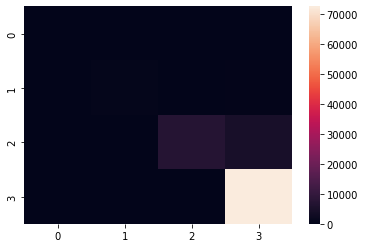

In [ ]:
cm=confusion_matrix(y_test_mnl,pred,labels=None)
print(confusion_matrix)

import seaborn
seaborn.heatmap(cm)
plt.show()


In [ ]:
from sklearn import metrics
cm1 = metrics.confusion_matrix(y_test_mnl,ypred_mnl)
print(cm1)
print("f1_score:",metrics.f1_score(y_test_mnl,ypred_mnl,average='weighted'))
print("Accuracy:",metrics.accuracy_score(y_test_mnl,ypred_mnl))


NameError: ignored

# **SUPPORT VECTOR CLASSIFIER model**

In [ ]:
from sklearn import svm

In [ ]:
df6 = pd.read_csv('data.csv')
df6.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2.0,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1.0,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.shape

(285332, 70)

In [ ]:
df=df1.loc[:,df1.columns!='accident_index']
df2=df.loc[:,df.columns!='local_authority_(highway)']
df3=df2.loc[:,df2.columns!='lsoa_of_accident_location']
df4=df3.loc[:,df3.columns!='date']

In [ ]:
#Splitting data into response and predictors.
Y_mnl = df6['accident_severity']  #Response
X_mnl = df6.drop(['accident_severity'],1)  #Predictors
#Splitting the response and predictors into train and test data.
X_train_mnl, X_test_mnl, y_train_mnl, y_test_mnl = train_test_split(X_mnl, Y_mnl, test_size=0.3, random_state=0)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn import metrics
model_RF = svm.SVC(decision_function_shape='ovr',probability=True).fit(X_train_mnl,y_train_mnl)
pred_svc = model_svc.predict(X_test_mnl)
print(metrics.accuracy_score(pred_svc,y_test_mnl))
cm3 = metrics.confusion_matrix(pred_svc,y_test_mnl)
print(cm3)

ValueError: ignored